# INFO BASICA

# LIBRERIAS

In [26]:
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math
from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

In [27]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# LECTURA DE DATOS

In [28]:
data_path = './data/Series de precios.xlsx'

In [29]:
# Leo los tipos de cambio de las divisas

wheat = pd.read_excel('./data/Series de precios.xlsx', sheet_name='Hoja2', 
                        usecols=['Date','Wheat'])
wheat.columns = ['Date','Precio']
wheat['Date'] = pd.to_datetime(wheat['Date'], format="%Y-%m-%d")
wheat = wheat.set_index('Date')
wheat = wheat.loc['2015-04-30':,:]
wheat = wheat.applymap(lambda x: x/1.1285216494845334)

In [30]:
# Procedo a calcular las medias moviles para 10, 30, 50 y 100 dias

wheat['10MM'] = wheat.Precio.rolling(window=10).mean()
wheat['30MM'] = wheat.Precio.rolling(window=30).mean()
wheat['50MM'] = wheat.Precio.rolling(window=50).mean()
wheat['100MM'] = wheat.Precio.rolling(window=100).mean()

In [31]:
# Visualizo una muestra

wheat.head(20)

,Precio,10MM,30MM,50MM,100MM
Date,,,,,
2015-04-30,321.216700,NaN,NaN,NaN,NaN
2015-05-01,318.779884,NaN,NaN,NaN,NaN
2015-05-04,317.893769,NaN,NaN,NaN,NaN
2015-05-05,320.109056,NaN,NaN,NaN,NaN
2015-05-06,324.761160,NaN,NaN,NaN,NaN
2015-05-07,317.007653,NaN,NaN,NaN,NaN
2015-05-08,317.672240,NaN,NaN,NaN,NaN
2015-05-11,317.450711,NaN,NaN,NaN,NaN
2015-05-12,316.343067,NaN,NaN,NaN,NaN


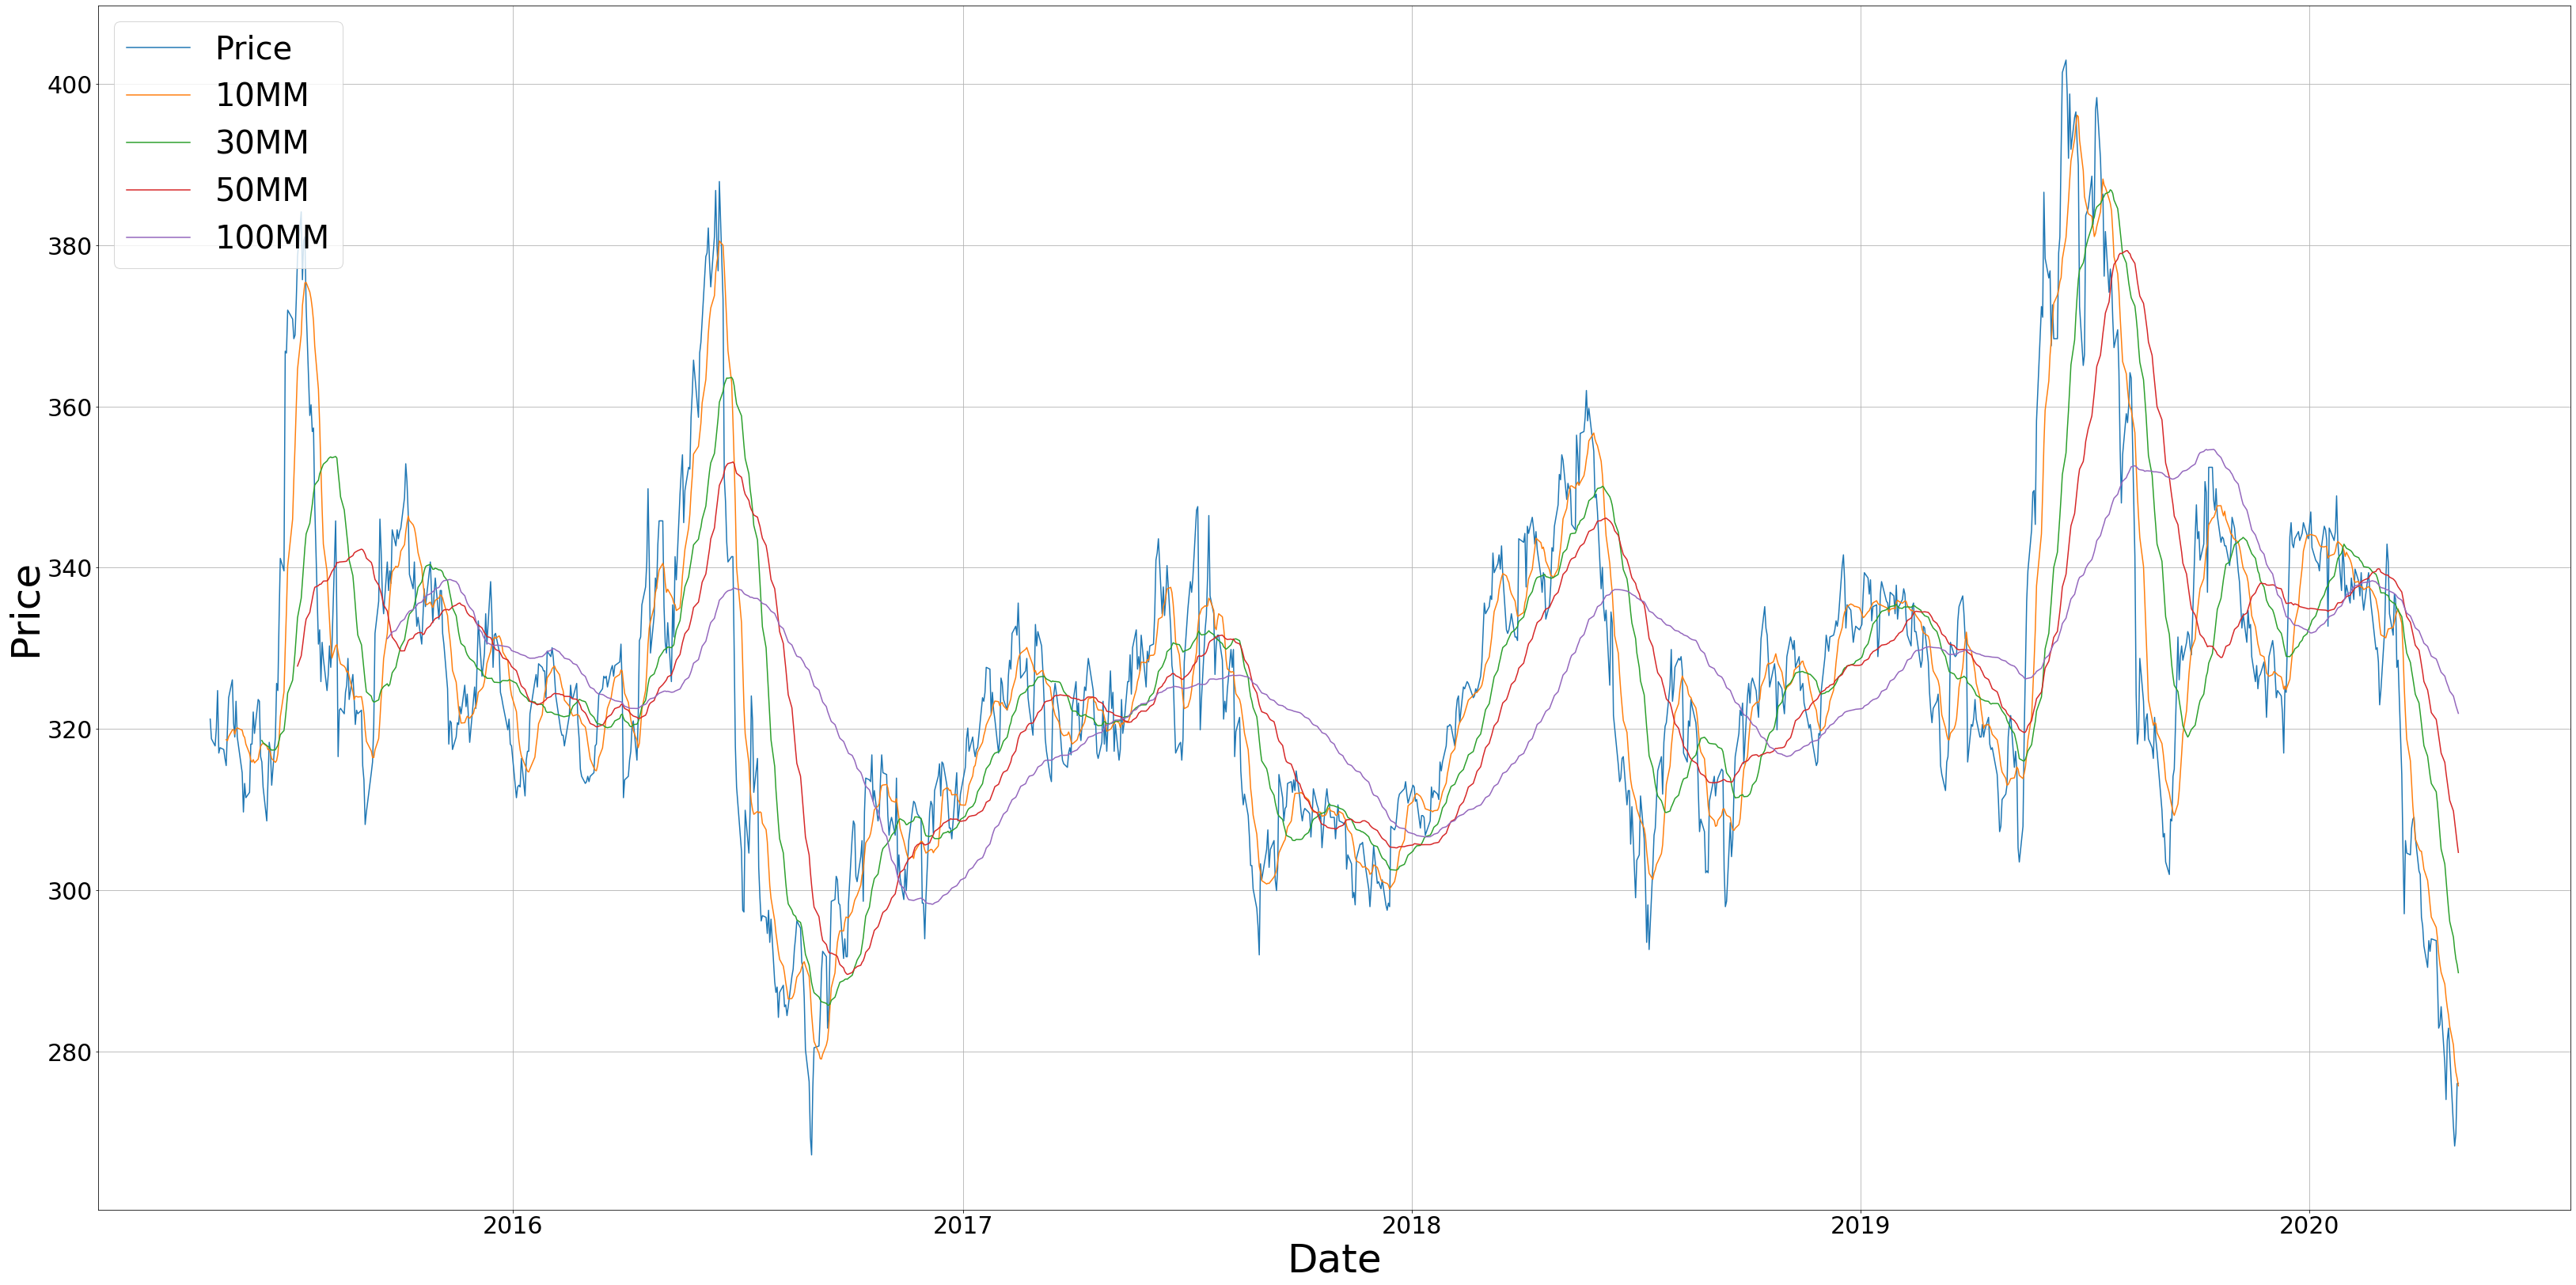

In [32]:
# Ploteo las series

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(wheat["Precio"])
ax1 = plt.plot(wheat["10MM"])
ax1 = plt.plot(wheat["30MM"])
ax1 = plt.plot(wheat["50MM"])
ax1 = plt.plot(wheat["100MM"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("Price", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Price", "10MM", "30MM", "50MM", "100MM"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [33]:
# Ahora establezco señales, serán a corto, a medio y a largo y para ello utilizaré las medias móviles

# 1 es posición larga y -1 posición corta

wheat['Señal a corto'] = np.where((np.isnan(wheat['10MM']) | np.isnan(wheat['30MM'])), 0, np.where((wheat['10MM']>wheat['30MM']), 1, -1))
wheat['Señal a medio'] = np.where((np.isnan(wheat['30MM']) | np.isnan(wheat['50MM'])), 0, np.where((wheat['30MM']>wheat['50MM']), 1, -1))
wheat['Señal a largo'] = np.where((np.isnan(wheat['50MM']) | np.isnan(wheat['100MM'])), 0, np.where((wheat['50MM']>wheat['100MM']), 1, -1))

In [34]:
# Visualizo una muestra, hay que mirar que si hay algún NaN devuelve True y no es así

wheat.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo
Date,,,,,,,,
2018-11-08,330.963965,327.286588,326.526006,320.507808,317.107341,1,1,1
2017-08-21,309.254147,317.406405,326.378320,327.902438,326.431487,-1,-1,1
2016-11-29,298.399238,306.019827,308.404953,305.829312,298.904323,-1,1,1
2016-06-24,340.711231,366.918083,363.499156,352.917465,337.133541,1,1,1
2016-05-18,354.002956,339.005459,335.852367,330.702561,325.529865,1,1,1
2015-12-24,322.988930,329.524028,326.001721,328.810706,330.288303,1,-1,-1
2017-05-22,332.293138,324.871924,322.656637,321.393923,322.410740,1,1,-1
2019-04-12,319.887527,320.463502,323.483678,326.404903,329.007866,-1,-1,-1
2017-03-02,330.299379,326.710613,326.156791,321.633174,314.962943,1,1,1


In [35]:
# Ahora determino el valor del conjunto de señales

def señalMM(corto=.9, medio=.05, largo=.05):
    wheat['Señal MM'] = corto*wheat['Señal a corto'] + medio*wheat['Señal a medio'] + largo*wheat['Señal a largo']


señalMM()

In [36]:
# Visualizo una muestra

wheat.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM
Date,,,,,,,,,
2019-06-27,389.890615,395.938350,375.727543,351.123082,338.447207,1,1,1,1.0
2017-06-06,334.286897,329.346805,324.997457,323.431987,323.797510,1,1,-1,0.9
2018-09-17,308.368032,309.032618,313.913635,313.436610,324.785528,-1,1,-1,-0.9
2017-07-11,347.578622,332.514667,331.864849,328.961345,325.574171,1,1,1,1.0
2018-02-09,320.773642,320.795795,314.526531,310.450402,309.251932,1,1,1,1.0
2017-08-11,319.665999,324.362408,331.178110,330.724714,326.624217,-1,1,1,-0.8
2018-12-24,334.729954,335.505305,327.943790,327.942313,322.302191,1,1,1,1.0
2017-05-10,323.653516,320.729337,321.275774,321.495826,321.247714,-1,-1,1,-0.9
2017-06-20,327.862563,336.923089,330.380606,326.847961,325.182065,1,1,1,1.0


In [37]:
# Ahora calculo las resistencia y soportes

wheat['Resistencia'] = wheat.Precio.rolling(window=100).max()
wheat['Soporte'] = wheat.Precio.rolling(window=100).min()

In [38]:
# Visualizo una muestra

wheat.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM,Resistencia,Soporte
Date,,,,,,,,,,,
2015-07-14,375.712774,372.522760,338.333489,330.197476,NaN,1,1,0,0.95,NaN,NaN
2018-04-23,335.394540,339.736504,338.769162,335.079970,322.537011,1,1,1,1.00,346.249450,297.513123
2018-12-10,331.628552,324.805466,325.204218,325.580816,320.678385,-1,-1,1,-0.90,335.173012,297.956180
2019-07-19,381.694051,387.165811,386.390461,371.583478,346.096595,1,1,1,1.00,402.960812,303.494399
2015-08-20,328.748678,327.175823,342.764064,341.061246,NaN,-1,1,0,-0.85,NaN,NaN
2019-10-15,348.464737,346.227297,330.616904,330.037975,354.678619,1,1,-1,0.90,402.960812,301.943698
2017-09-25,313.463193,308.567408,306.507190,315.634175,322.324344,1,-1,-1,0.80,347.578622,291.974904
2018-07-16,302.829813,301.345570,315.205886,330.197476,334.397661,-1,-1,-1,-1.00,361.977991,292.639490
2018-07-02,299.063824,311.070683,331.215031,338.052886,336.453448,-1,-1,1,-0.90,361.977991,299.063824


In [39]:
# Genero la señal de resistencias y soportes

wheat['Señal R/S'] = np.where((wheat.Precio >= wheat.Resistencia), 1, 
                              np.where((wheat.Precio <= wheat.Soporte), -1, 0))

In [40]:
# Visualizo una muestra

wheat.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM,Resistencia,Soporte,Señal R/S
Date,,,,,,,,,,,,
2017-09-27,313.684722,311.026377,306.160129,314.823380,322.204718,1,-1,-1,0.8,347.578622,291.974904,0
2018-11-16,323.210459,327.840410,327.020753,322.293330,317.840602,1,1,1,1.0,335.173012,292.639490,0
2016-07-06,297.513123,327.818257,357.000979,350.485079,337.007270,-1,1,1,-0.8,387.896856,297.513123,-1
2017-02-17,326.311861,329.391111,324.251644,319.497637,312.873927,1,1,1,1.0,335.616069,291.753375,0
2019-01-02,332.957724,334.309050,328.888979,327.973327,322.519289,1,1,1,1.0,341.597346,297.956180,0
2018-05-25,359.762704,355.730880,348.302283,344.494942,333.595727,1,1,1,1.0,361.977991,306.817331,0
2015-05-19,320.773642,319.931833,NaN,NaN,NaN,0,0,0,0.0,NaN,NaN,0
2017-12-18,307.481917,301.057583,302.504904,305.288782,308.374678,-1,-1,-1,-1.0,331.628552,291.974904,0
2015-07-09,373.275958,360.117150,331.613783,NaN,NaN,1,0,0,0.9,NaN,NaN,0


In [41]:
# Genero la señal total

def señal_total(medias=.5, RS=.5):
    wheat['Señal Total'] = medias*wheat['Señal MM'] + RS*wheat['Señal R/S']
    
señal_total()

In [42]:
# Resultado final

wheat.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM,Resistencia,Soporte,Señal R/S,Señal Total
Date,,,,,,,,,,,,,
2017-08-16,312.355550,321.903439,329.413264,329.794293,326.613140,-1,-1,1,-0.90,347.578622,312.355550,-1,-0.950
2017-08-28,297.734651,306.950248,321.504687,324.464311,325.434607,-1,-1,-1,-1.00,347.578622,297.734651,-1,-1.000
2015-06-01,312.134021,316.941195,NaN,NaN,NaN,0,0,0,0.00,NaN,NaN,0,0.000
2019-06-21,391.884374,390.444437,365.168006,345.190542,336.123370,1,1,1,1.00,402.960812,303.494399,0,0.500
2015-10-07,350.680025,345.540558,332.817423,330.507616,334.227084,1,1,-1,0.90,384.130867,308.146503,0,0.450
2019-09-03,309.918733,318.181756,340.799842,358.340489,351.765516,-1,-1,1,-0.90,402.960812,303.494399,0,-0.450
2015-05-19,320.773642,319.931833,NaN,NaN,NaN,0,0,0,0.00,NaN,NaN,0,0.000
2020-01-30,336.280655,341.397970,342.668068,336.178752,336.291732,-1,1,-1,-0.90,352.452255,301.943698,0,-0.450
2016-12-01,293.968663,305.000795,307.142239,305.616645,298.682795,-1,1,1,-0.80,324.096574,267.163683,0,-0.400


In [43]:
# Genero un nuevo dataframe donde ver los resultados de la estrategia

Resultados = wheat.loc[:,['Precio', 'Señal Total']]

In [44]:
# Creo la variable que muestra los resultados

Resultados['Trending Following'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Trending Following'].iloc[i] = Resultados['Trending Following'].iloc[i-1]*(1+Resultados['Señal Total'].iloc[i]*
                                                                          (Resultados.Precio.iloc[i]/Resultados.Precio.iloc[i-1]-1))

In [45]:
# Visualizo una muestra

Resultados.sample(20)

,Precio,Señal Total,Trending Following
Date,,,
2019-01-17,336.723713,0.50,158.170973
2017-08-25,300.171468,-1.00,125.290888
2018-03-06,336.502184,1.00,137.102659
2018-04-06,344.255691,0.50,144.943011
2015-11-23,325.425746,-0.50,95.269690
2016-05-27,365.743980,1.00,100.266260
2017-05-05,320.552114,0.45,126.528129
2017-11-06,308.368032,-0.45,124.725936
2018-04-09,346.249450,1.00,145.782450


In [46]:
# Genero el Buy&Hold para hacer la comparación

Resultados['Buy&Hold'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Buy&Hold'].iloc[i] = Resultados['Buy&Hold'].iloc[i-1]*(1+(Resultados.Precio.iloc[i]/
                                                                         Resultados.Precio.iloc[i-1]-1))

In [47]:
# Visualizo una muestra

Resultados.sample(20)

,Precio,Señal Total,Trending Following,Buy&Hold
Date,,,,
2016-10-25,309.475676,0.45,122.033323,96.344828
2019-08-22,321.881286,-0.45,199.693337,100.206897
2019-01-30,337.831357,0.50,158.995163,105.172414
2016-07-20,299.063824,-0.45,110.385694,93.103448
2018-01-10,309.254147,0.45,124.848747,96.275862
2017-07-07,338.717472,-0.40,120.883589,105.448276
2015-10-23,336.502184,-0.45,93.985527,104.758621
2016-08-19,296.183950,-0.50,114.661420,92.206897
2015-11-03,337.166771,-0.45,93.874787,104.965517


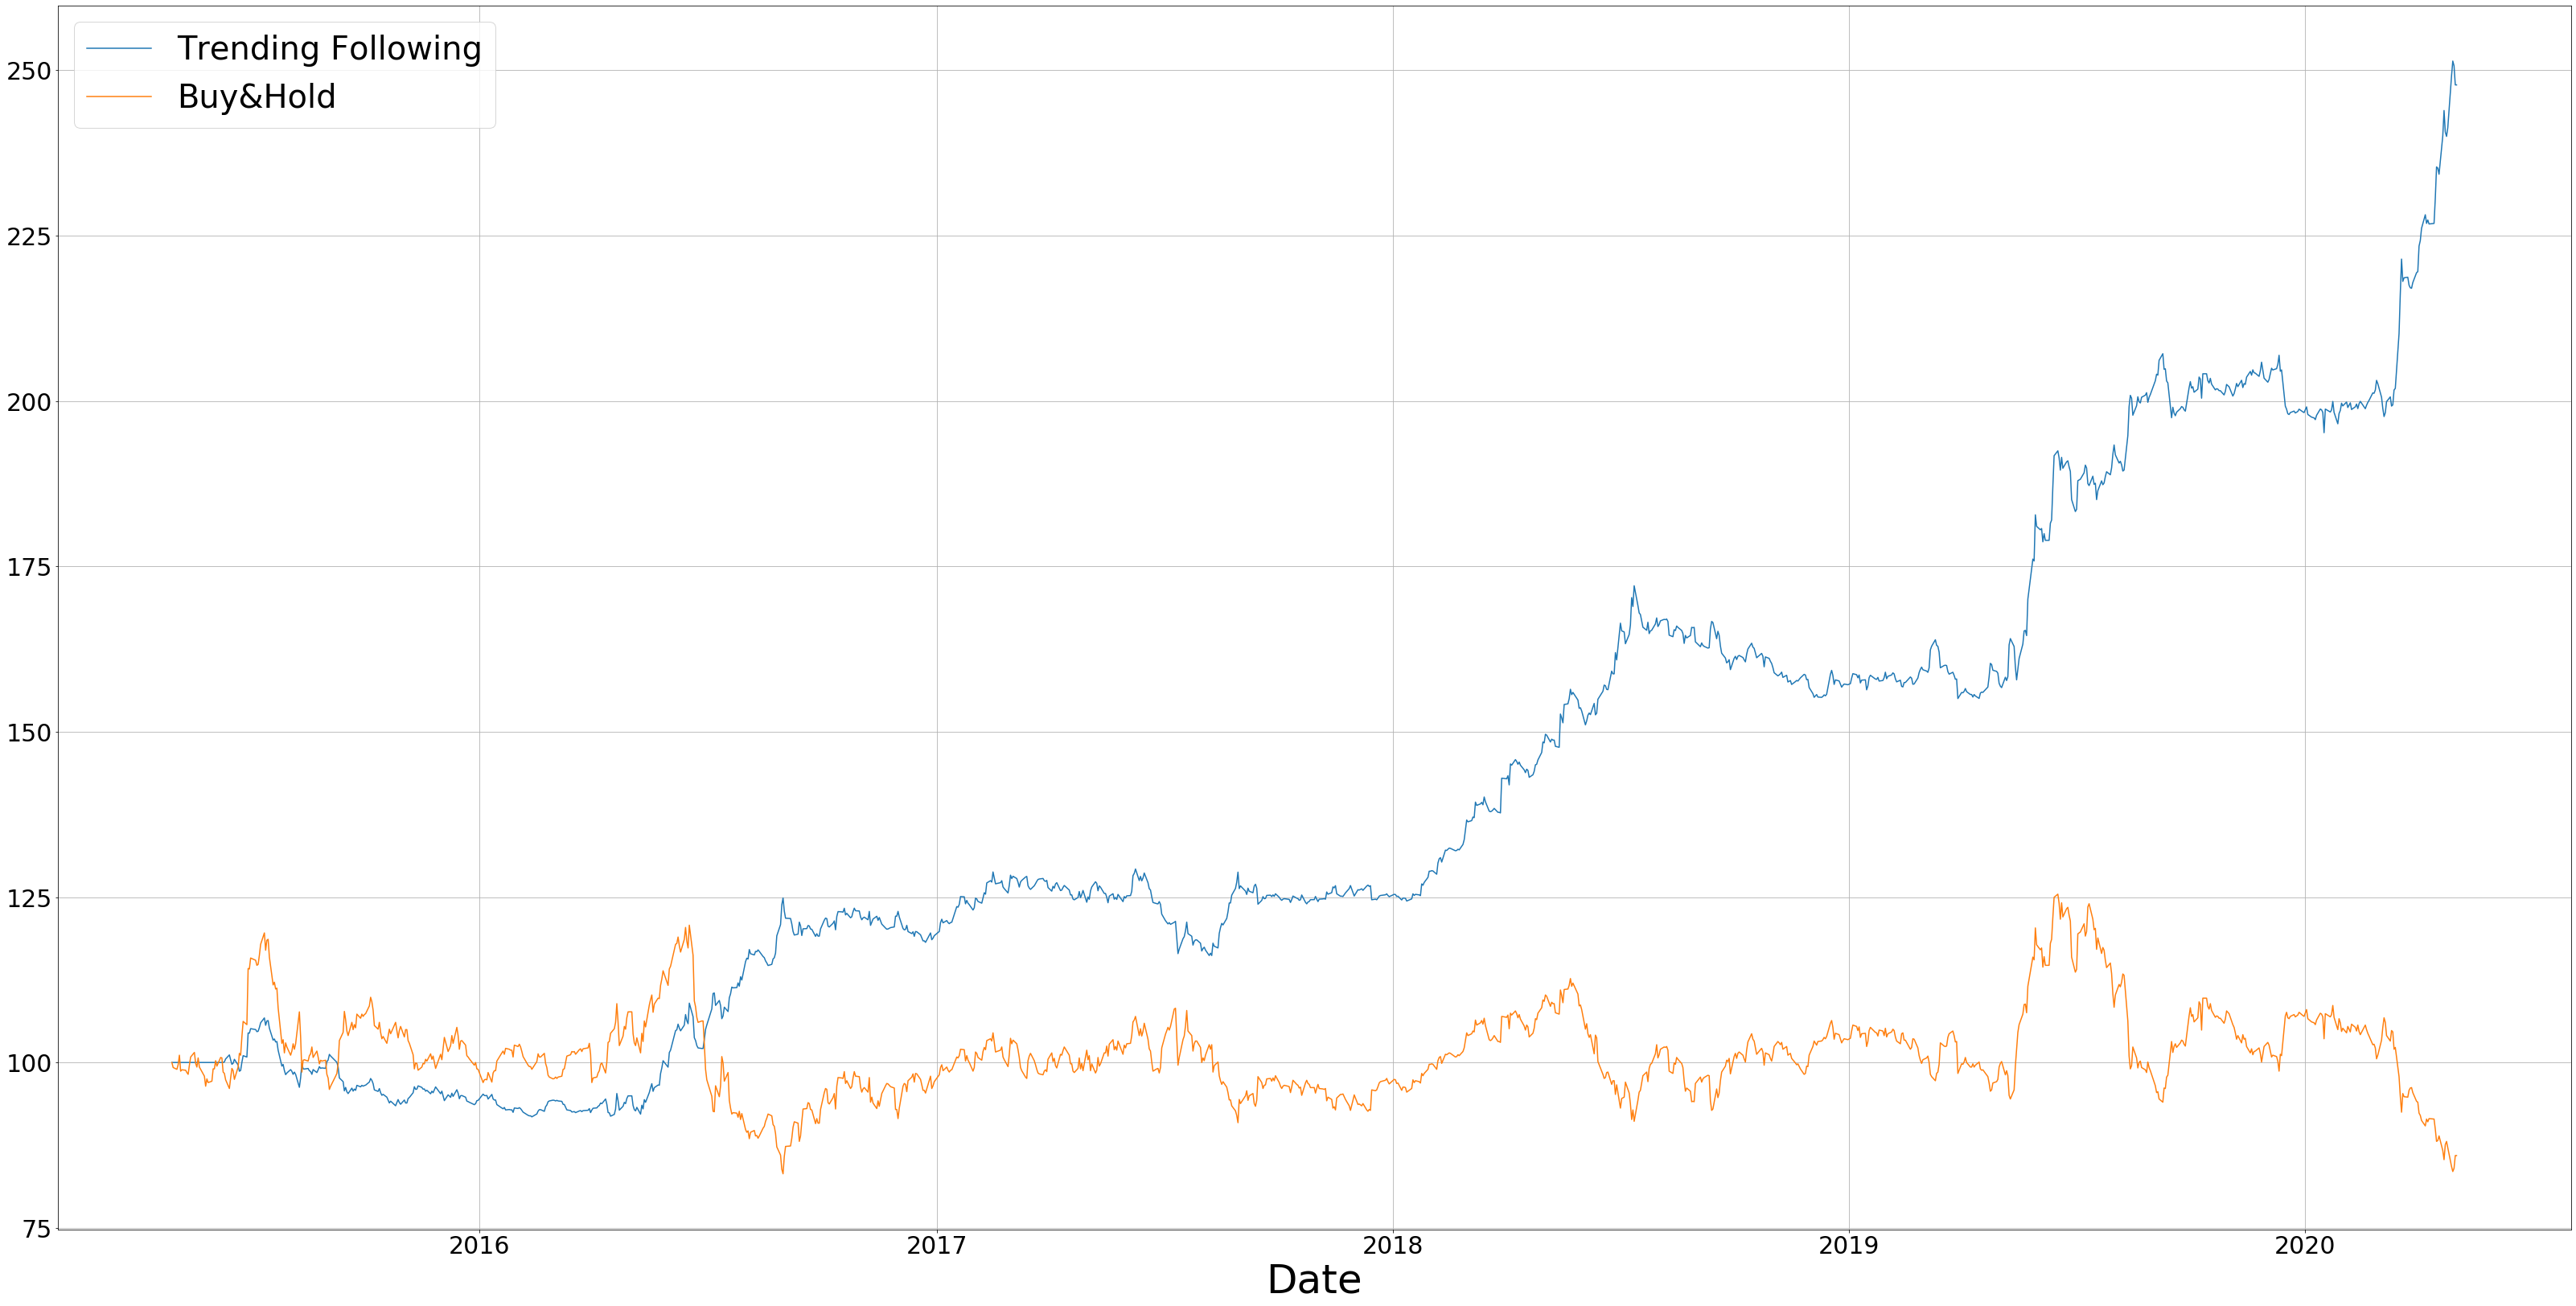

In [48]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(Resultados["Trending Following"])
ax1 = plt.plot(Resultados["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Trending Following", "Buy&Hold"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [49]:
wheat_medias = pd.DataFrame(Resultados.loc[:, 'Trending Following'])
wheat_medias.columns = ['TF wheat']
wheat_medias

,TF wheat
Date,
2015-04-30,100.000000
2015-05-01,100.000000
2015-05-04,100.000000
2015-05-05,100.000000
2015-05-06,100.000000
2015-05-07,100.000000
2015-05-08,100.000000
2015-05-11,100.000000
2015-05-12,100.000000


In [50]:
wheat_medias.to_csv('./data_resultante/TFwheat.csv')